In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
data_random = np.load('data/random_button_press.npz')
data_vrnd = np.load('data/vrnd_button_press.npz')
data_hgcrl = np.load('data/gcrl_button_press.npz')
data_aps = np.load('data/aps_button_press_2.npz')
data_cic = np.load('data/cic_button_press.npz')

In [4]:
def moving_average(a, n=10):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

Text(0, 0.5, 'Extrinsic Reward')

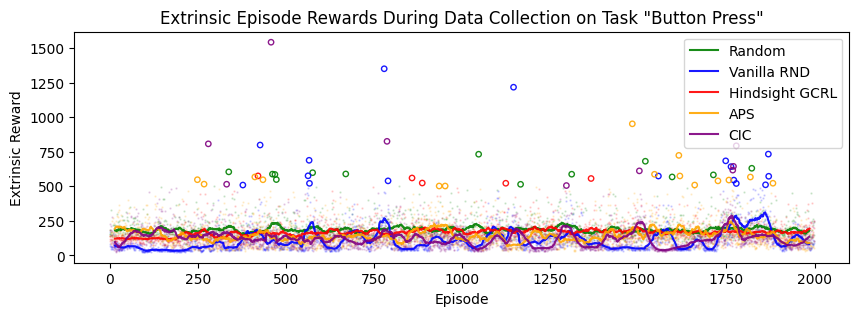

In [5]:
plt.figure(figsize=(10, 3))
handles = []
colors = ['green', 'blue', 'red', 'orange', 'purple']
for i, data in enumerate([data_random, data_vrnd, data_hgcrl, data_aps, data_cic]):
    ep_r = data['reward'].reshape((-1, 500)).sum(axis=1)
    ep_r_ma = moving_average(ep_r, n=30)
    high_r_mask = ep_r > 500
    x_low = np.arange(2000)[~high_r_mask]
    x_high = np.arange(2000)[high_r_mask]
    handles.append(plt.plot(range(15, 1986), ep_r_ma, c=colors[i], linewidth=1.5, alpha=0.9)[0])
    plt.scatter(x_low, ep_r[~high_r_mask], c=colors[i], s=0.5, alpha=0.15)
    plt.scatter(x_high, ep_r[high_r_mask], facecolors='none', edgecolors=colors[i], s=15, alpha=0.9)
plt.title('Extrinsic Episode Rewards During Data Collection on Task \"Button Press\"')
plt.legend(handles, ('Random', 'Vanilla RND', 'Hindsight GCRL', 'APS', 'CIC'))
plt.xlabel('Episode')
plt.ylabel('Extrinsic Reward')